In [1]:
import random
import math
from functools import reduce
from operator import mul
from scipy.linalg import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Implementation Nijenhuis' algorithm

In [2]:
# For randomizing Frobenius problem's input
def nums(n=5,r=100):
    out = list()
    l = list(range(2,r))
    gcd = l.pop()
    out.append(gcd)
    while True:
        nl = random.sample(l,n)
        if math.gcd(*nl)==1:
            return nl

In [3]:
A =  [5, 7, 11, 17]
# = nums()
A.sort(reverse=True)
print("A = ",A)
n = len(A)
a0 = A.pop()
g = nx.DiGraph()
g.add_nodes_from(range(a0))

A =  [17, 11, 7, 5]


In [4]:
e = list()
for i in range(a0):
    for x in A:
        if i!=(i+x)%a0:
            e.append((i,(i+x)%a0,x))
g.add_weighted_edges_from(e)
print("Vertices = ",g.nodes())

Vertices =  [0, 1, 2, 3, 4]


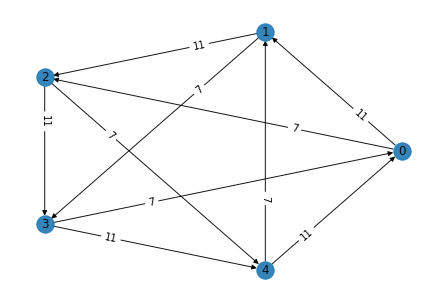

In [5]:
pos=nx.circular_layout(g)
nx.draw(
    g,
    pos,
    alpha=0.9,
    labels={node:node for node in g.nodes()}
)

edge_labels = nx.get_edge_attributes(g,'weight')
x=nx.draw_networkx_edge_labels(g, pos, edge_labels = edge_labels,label_pos=0.7)

In [6]:
adj=nx.adjacency_matrix(g).todense()
print(adj)

[[ 0 11  7  0  0]
 [ 0  0 11  7  0]
 [ 0  0  0 11  7]
 [ 7  0  0  0 11]
 [11  7  0  0  0]]


In [7]:
length, path = nx.single_source_dijkstra(g, 0)
print(length)
print("f(A) = ",max(length.values())-a0)

{0: 0, 2: 7, 1: 11, 4: 14, 3: 18}
f(A) =  13
